Importing Modules and Libraries for data handling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV files

In [3]:
members = pd.read_csv("members.csv")
songs = pd.read_csv("songs.csv")
song_extrainfo = pd.read_csv("song_extra_info.csv")
data = pd.read_csv("train.csv")

# Preprocessing

In [3]:
print(data.shape, members.shape, songs.shape, song_extrainfo.shape)

(7377418, 6) (34403, 7) (2296320, 7) (2295971, 3)


Merging dataframes into one

In [4]:
songs_info = pd.merge(songs,song_extrainfo)
all_data = pd.merge(data, songs_info, on='song_id', how='left')
all_data = pd.merge(all_data, members, on='msno', how='left')
all_data.shape

(7377418, 20)

Heatmap representation

<AxesSubplot:>

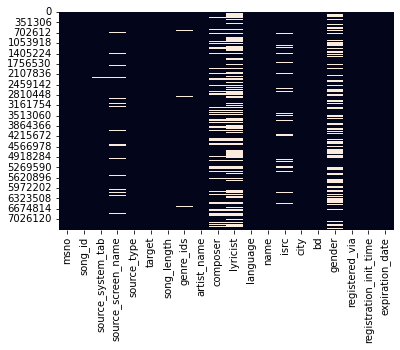

In [5]:
sns.heatmap(all_data.isna(), cbar=False)

Handling missing values 

In [5]:
# missing data percent
total = all_data.isna().sum().sort_values(ascending=False)
percent = (all_data.isna().sum()/all_data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lyricist,3179542,0.430983
gender,2961479,0.401425
composer,1676694,0.227274
isrc,577963,0.078342
source_screen_name,414804,0.056226
genre_ids,119906,0.016253
source_system_tab,24849,0.003368
source_type,21539,0.002920
language,1605,0.000218
name,1571,0.000213


In [14]:
all_data.isna().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                  1569
genre_ids                  119906
artist_name                  1569
composer                  1676694
lyricist                  3179542
language                     1605
name                         1571
isrc                       577963
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [15]:
#pie_plot= all_data.gender

In [17]:
all_data.source_system_tab.fillna('Others', inplace=True)
all_data.source_screen_name.fillna('Others', inplace=True)
all_data.source_type.fillna('Others', inplace=True)
all_data.gender.fillna('Unknown', inplace=True)
all_data.language.fillna(0.0, inplace=True)

all_data.drop(columns='composer', inplace=True)
all_data.drop(columns='lyricist', inplace=True)
all_data.drop(columns='isrc', inplace=True)

all_data.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
song_length                 1569
genre_ids                 119906
artist_name                 1569
language                       0
name                        1571
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
dtype: int64

In [17]:
all_data.dropna(inplace=True)
all_data.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [18]:
all_data.shape

(7257510, 17)

# Exploitary Data Analysis

Creating dates

In [20]:
# registration_init_time
all_data.registration_init_time = pd.to_datetime(all_data.registration_init_time, format='%Y%m%d', errors='ignore')
all_data['registration_init_time_year'] = all_data['registration_init_time'].dt.year
all_data['registration_init_time_month'] = all_data['registration_init_time'].dt.month
all_data['registration_init_time_day'] = all_data['registration_init_time'].dt.day

# expiration_date
all_data.expiration_date = pd.to_datetime(all_data.expiration_date,  format='%Y%m%d', errors='ignore')
all_data['expiration_date_year'] = all_data['expiration_date'].dt.year
all_data['expiration_date_month'] = all_data['expiration_date'].dt.month
all_data['expiration_date_day'] = all_data['expiration_date'].dt.day

# Dates to category
all_data['registration_init_time'] = all_data['registration_init_time'].astype('category')
all_data['expiration_date'] = all_data['expiration_date'].astype('category')
all_data.shape

(7377418, 23)

##### Distribution of 'Target' variable 

<AxesSubplot:xlabel='target', ylabel='count'>

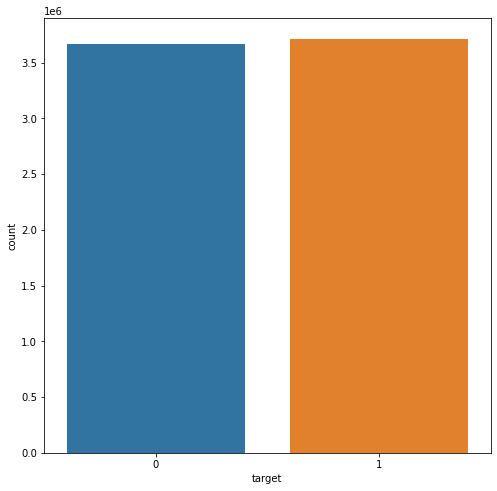

In [6]:
plt.figure(figsize = (8, 8)) 
sns.countplot(x='target', data=all_data)

Conclusion : The Target Variable which is binary ('0' and '1') is almost uniformly balanced. Hence models to be trained on the train dataset will work well.

#####  Gender Plot 

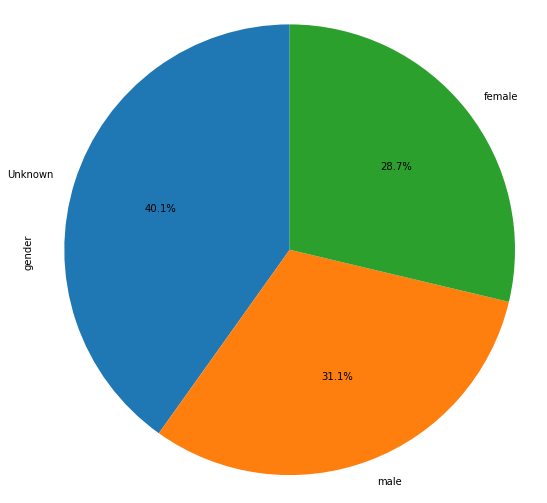

In [79]:
ax= plt.figure(figsize = (9, 9)) 
pp = pd.value_counts(all_data.gender) 
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

Conclusion : The ratio percentage between male and female audience is almost equivalent. Also almost 40% of the audiences have refused to share their gender, thereafter the missing valus of 'gender' are filled with "Unknown' variable.

##### Registration Dates Pattern Over the years (uptil 2017 )

<AxesSubplot:xlabel='registration_init_time_year', ylabel='count'>

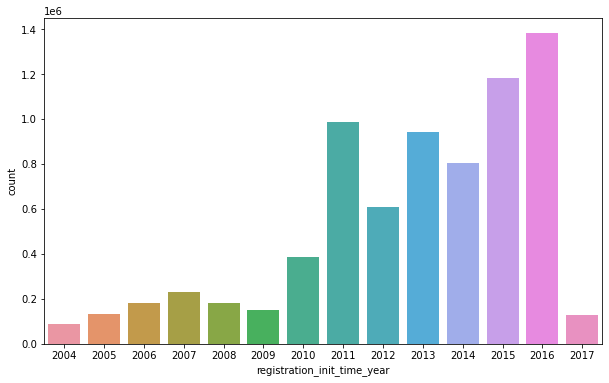

In [23]:
plt.figure(figsize = (10, 6))
sns.countplot(x='registration_init_time_year', data=all_data)

Conclusion : The KK-box platform got popularity since 2011 and saw maximum parrticipation in terms of registration in the year 2016. Although the craze dropped in the next year i.e. 2017 itself

##### Birth Date (Age) Plot

<AxesSubplot:xlabel='bd', ylabel='count'>

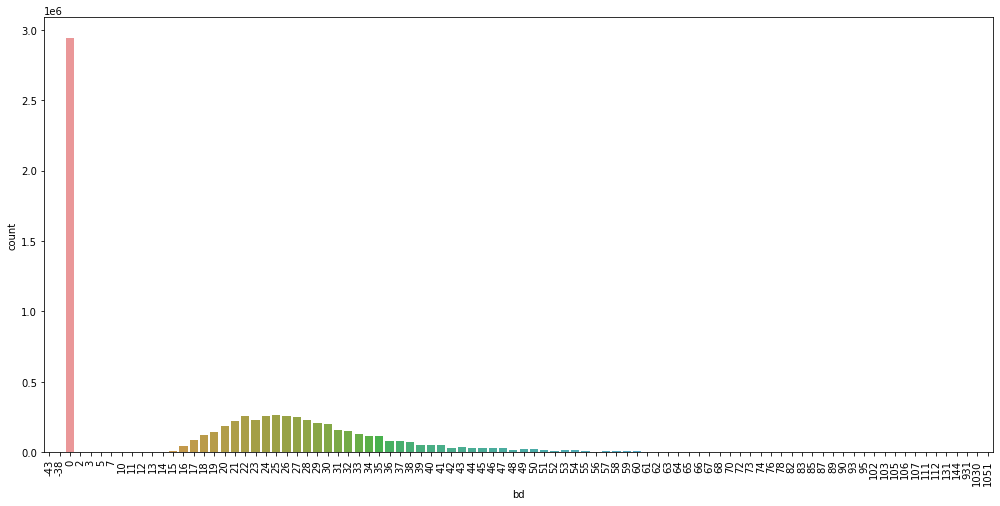

In [25]:
plt.figure(figsize = (17, 8))
plt.xticks(rotation=90)
sns.countplot(x= all_data.bd)

Conclusion : Most of the audiences who shared their age were mostly faulty. The most age figure which was shared was '0' which cant be hold true for an user.

##### Most Listened Artist

c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22825 missing from c

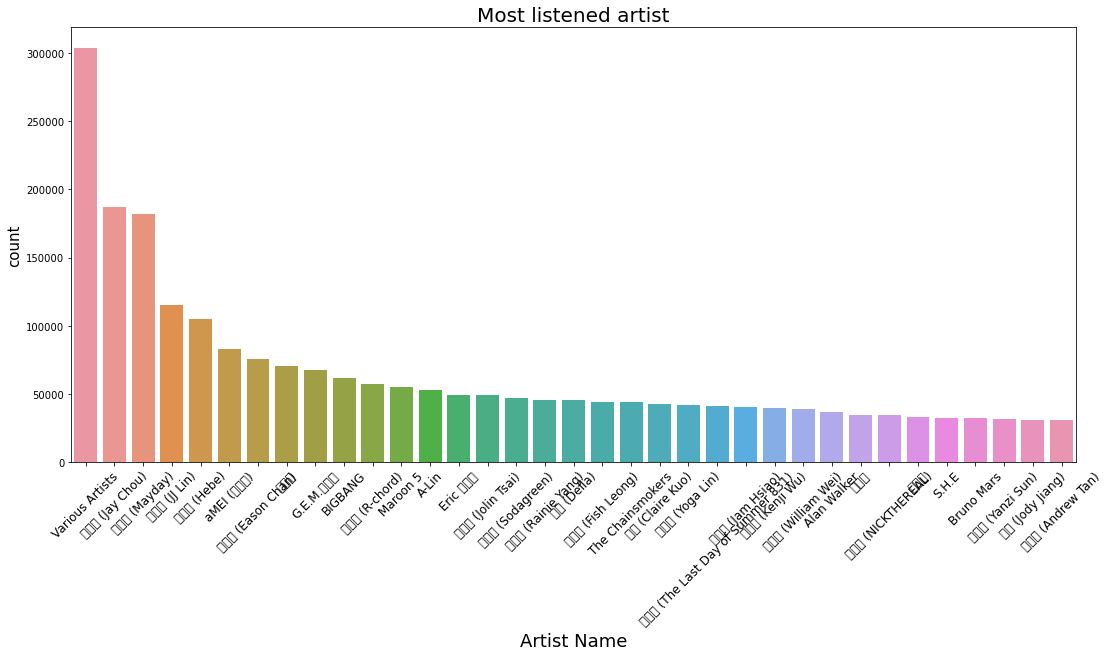

In [73]:
a = pd.DataFrame(all_data.groupby('artist_name').size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:35, :]
a.replace(0, 'NAN', inplace = True)
plt.figure(figsize = (18,8))
ax = sns.barplot(x= 'artist_name',y = 0, data = a)
plt.xticks(rotation= 45, fontsize = 12)
plt.xlabel('Artist Name', fontdict={'fontsize': 18})
plt.ylabel('count',fontdict={'fontsize': 15})
plt.title('Most listened artist', fontdict={'fontsize': 20})
plt.show()

Conclusion : Around 4.1% of the artitst_name variable are unknown and named with 'Various artist'. The most famous artist the kk-box platform are Jay Chou and Mayday engaging 2.5% of the registered auidience .

##### Top Artist distribution among gender

c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\costa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22825 missing from c

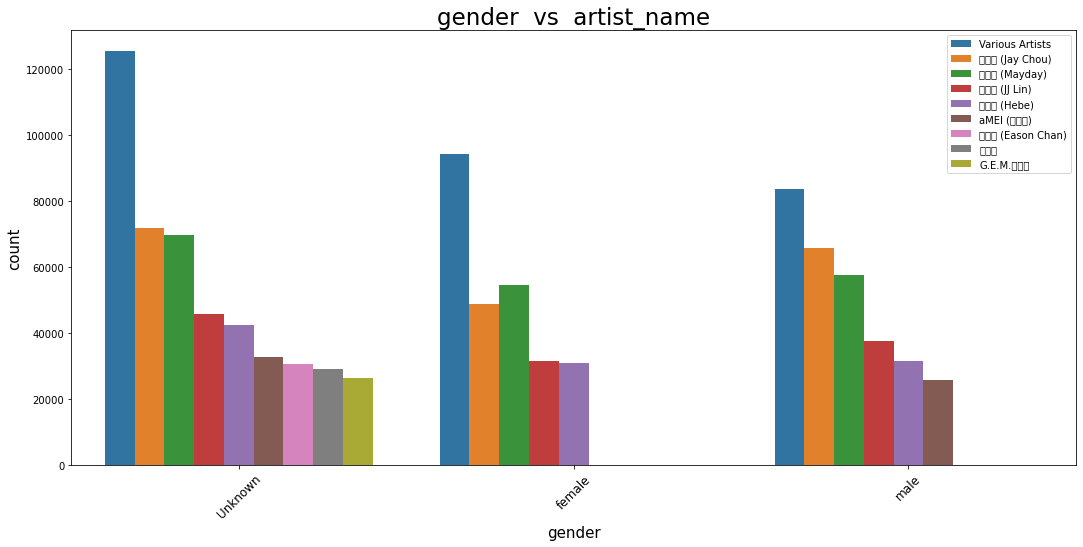

In [72]:
a = pd.DataFrame(all_data.groupby(['gender', 'artist_name']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:20, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('gender')[0].sum().reset_index())
plt.figure(figsize = (18,8))
ax = sns.barplot(hue= 'artist_name',y = 0, data = a, x = 'gender')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('gender  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
plt.show()

Conclusion : Jay Chou which was among the most listened artist is more popular in males than in females.

##### Target vs SourceType

<AxesSubplot:xlabel='source_type', ylabel='count'>

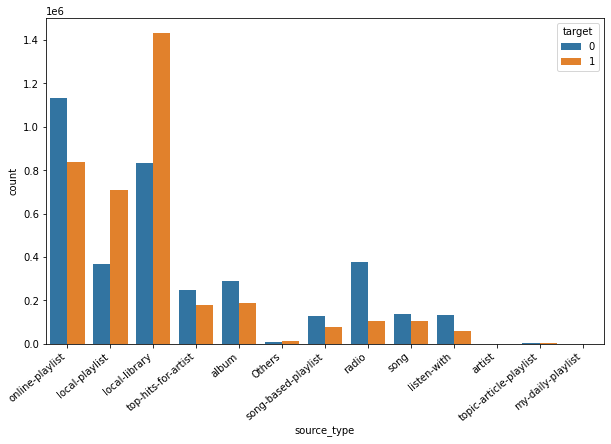

In [49]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40,ha='right')
sns.countplot(x='source_type', hue='target', data=all_data)

##### Target vs SourceScreenType

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

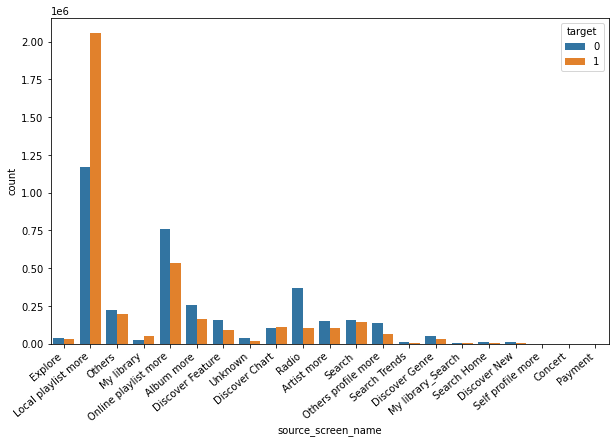

In [50]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x=all_data['source_screen_name'], hue='target', data=all_data)

##### Target vs SourceSystemTab

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

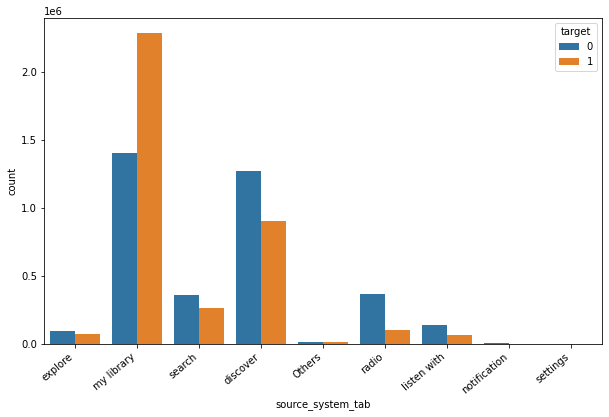

In [53]:
plt.figure(figsize = (10, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x='source_system_tab', hue='target', data=all_data)

Conclusion : Most of the registered auidience were seen engaging with the kk-box platform via 'local library'as their entry point to play music. Also auidiences listening to music via "my library" has more chances to repeat or play the same song within a duration while auidiences listening via "radio" have the least possibility.

##### Genre Id Distribution

<AxesSubplot:xlabel='genre_ids'>

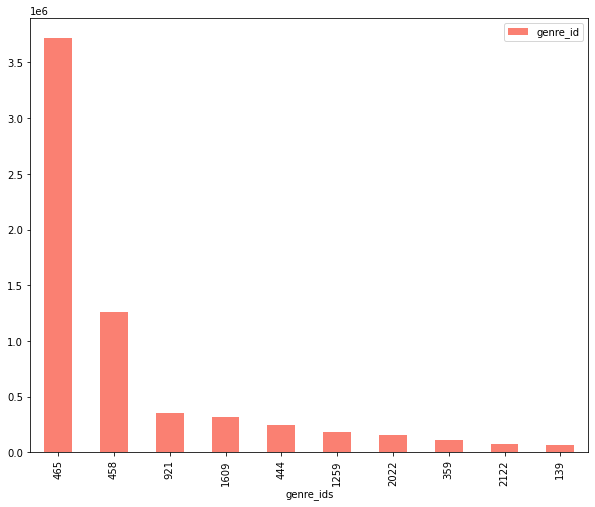

In [65]:
top10 = pd.DataFrame(all_data.groupby('genre_ids')['genre_ids'].count().nlargest(10))
top10.rename(columns={'genre_ids':'genre_id'},inplace=True)
top10.plot(kind='bar',figsize=(10,8),color='salmon')

Conclusion : The most listened genre among the regsitered auidiences is genre id 465.

##### Correlation Plot among the various features

In [77]:
corr = all_data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=5)

,target,song_length,language,city,bd,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
target,1.00000,-0.00181,-0.02749,0.01211,-0.00050,0.00989,-0.00196,-0.00557,-0.00177,0.04225,0.01182,0.00192
song_length,-0.00181,1.00000,-0.21043,0.00519,0.00490,0.00275,-0.00743,0.00152,-0.00000,0.00457,0.00132,0.00039
language,-0.02749,-0.21043,1.00000,-0.02219,-0.01134,-0.00024,0.00907,-0.00692,0.00150,-0.00399,-0.00126,-0.00044
city,0.01211,0.00519,-0.02219,1.00000,0.40053,0.07376,-0.28018,-0.03331,0.00784,0.15015,-0.02483,0.00489
bd,-0.00050,0.00490,-0.01134,0.40053,1.00000,0.09843,-0.32434,-0.00945,0.00015,0.11760,-0.01731,0.03423
registered_via,0.00989,0.00275,-0.00024,0.07376,0.09843,1.00000,-0.44273,-0.01770,0.02554,0.08413,0.06473,0.05696
registration_init_time_year,-0.00196,-0.00743,0.00907,-0.28018,-0.32434,-0.44273,1.00000,-0.04770,-0.04717,-0.09202,-0.05763,-0.07846
registration_init_time_month,-0.00557,0.00152,-0.00692,-0.03331,-0.00945,-0.01770,-0.04770,1.00000,0.04444,-0.04791,0.05691,-0.00669
registration_init_time_day,-0.00177,-0.00000,0.00150,0.00784,0.00015,0.02554,-0.04717,0.04444,1.00000,-0.00209,-0.01353,0.14935
expiration_date_year,0.04225,0.00457,-0.00399,0.15015,0.11760,0.08413,-0.09202,-0.04791,-0.00209,1.00000,-0.47284,-0.03010


Conclusion : Most of the features selected for the plot are quite weakly related except for city and birth date(bd) which has the most positive correlation (0.40053) between them among all the other features.

# Models Methods and Results